# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy
from matplotlib import pylab
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from itertools import product
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import seaborn as sns

### Dataset

In [121]:
main_df = pd.read_csv('customer.csv')
main_df.drop(['CustomerID', 'Unnamed: 5', 'Unnamed: 6'], axis = 1, inplace = True)
main_df.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [122]:
main_km_df = main_df.copy()
main_hr_df = main_df.copy()
main_ds_df = main_df.copy()

### Plots

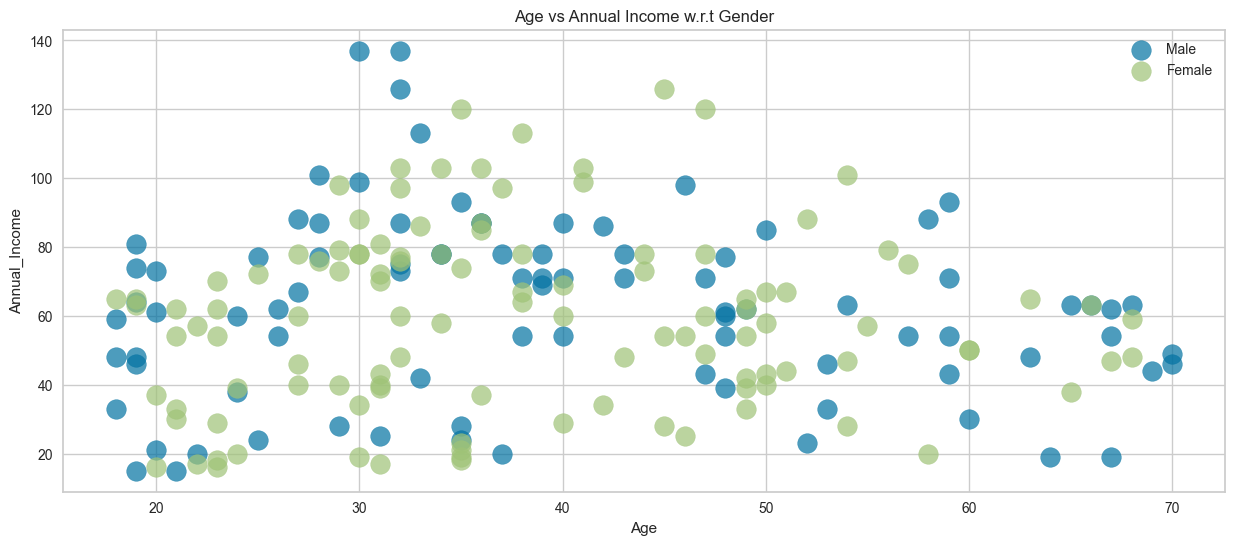

In [108]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    filtered_df = main_df[main_df['Gender'] == gender]
    plt.scatter(filtered_df['Age'], filtered_df['Annual_Income'], s=200, alpha=0.7, label=gender)
    
plt.xlabel('Age')
plt.ylabel('Annual_Income') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

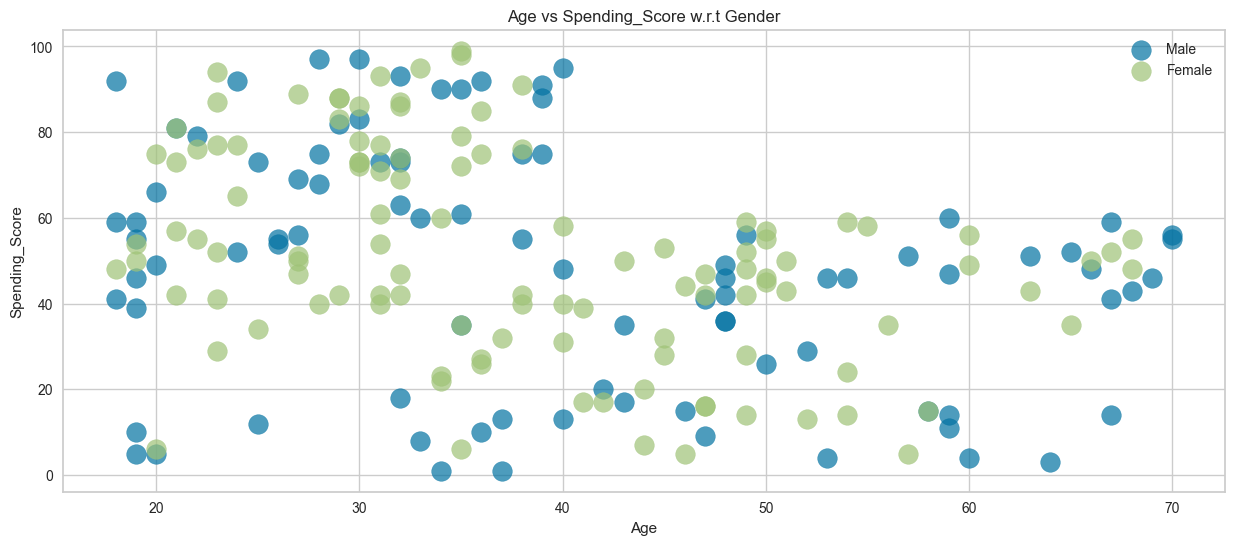

In [109]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    filtered_df = main_df[main_df['Gender'] == gender]
    plt.scatter(filtered_df['Age'], filtered_df['Spending_Score'], s=200, alpha=0.7, label=gender)
    
plt.xlabel('Age')
plt.ylabel('Spending_Score') 
plt.title('Age vs Spending_Score w.r.t Gender')
plt.legend()
plt.show()

# KMeans

### PreProcess

In [123]:
main_km_df_numeric = main_km_df.copy()
main_km_df_numeric.head()

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [124]:
main_km_df_numeric['Gender_num'] = main_km_df_numeric['Gender'].replace({'Male':0,'Female':1})

main_km_df_numeric.head()

C:\Users\Mohammad\AppData\Local\Temp\ipykernel_1656\4177679351.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_km_df_numeric['Gender_num'] = main_km_df_numeric['Gender'].replace({'Male':0,'Female':1})


,Gender,Age,Annual_Income,Spending_Score,Gender_num
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [125]:
main_km_df_numeric.drop(['Gender'], axis = 1, inplace = True)

main_km_df_numeric.head()

,Age,Annual_Income,Spending_Score,Gender_num
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [126]:
x_km = main_km_df_numeric.values

x_km_age_income = main_km_df_numeric[['Age', 'Annual_Income']].values
x_km_age_spent = main_km_df_numeric[['Age', 'Spending_Score']].values
x_km_gender_income = main_km_df_numeric[['Gender_num', 'Annual_Income']].values
x_km_gender_spent = main_km_df_numeric[['Gender_num', 'Spending_Score']].values

x_km[0:5]

array([[19, 15, 39,  0],
       [21, 15, 81,  0],
       [20, 16,  6,  1],
       [23, 16, 77,  1],
       [31, 17, 40,  1]])

In [133]:
scaler = MinMaxScaler()
norm_x_km = scaler.fit_transform(x_km)

### Modelling

In [139]:
clusters = 5
kmeans = KMeans(init='k-means++', n_clusters=clusters, n_init=12, random_state=0)
kmeans.fit(norm_x_km)
labels = kmeans.labels_

main_km_df['Cluster'] = labels
main_km_df_numeric['Cluster'] = labels

main_km_df_numeric.head()

,Age,Annual_Income,Spending_Score,Gender_num,Cluster
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,3
4,31,17,40,1,3


### Visualizing

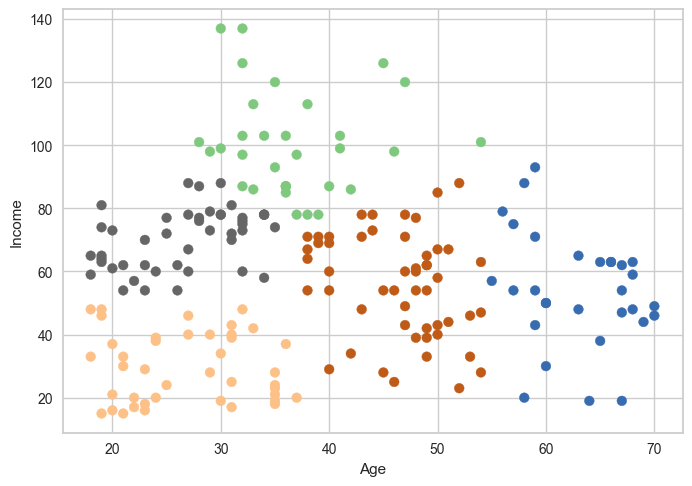

In [137]:
plt.scatter(x_km[:, 0], x_km[:, 1], c=labels, cmap='Accent', alpha=1)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

### Evaluation

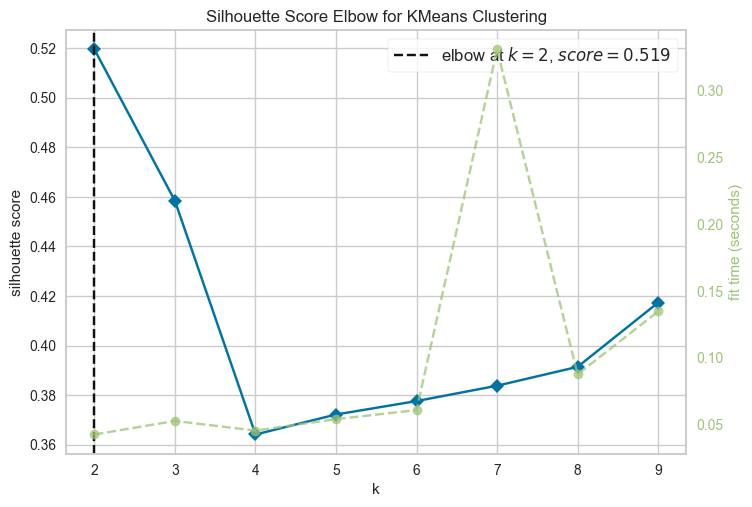

In [140]:
visualizer = KElbowVisualizer(kmeans, k=(2,10), metric='silhouette')
visualizer.fit(norm_x_km)
visualizer.show()
plt.show()

In [141]:
from sklearn.metrics import silhouette_score

optimal_k = 10

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(norm_x_km)
labels = kmeans.labels_
silhouette_avg = silhouette_score(norm_x_km, labels)
print(f"Silhouette Score for {optimal_k} = {silhouette_avg}")

Silhouette Score for 10 = 0.3261954593397033


In [142]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(norm_x_km, labels)
print(f"DB Index: {db_score}")


DB Index: 1.0188636162565783


<Axes: >

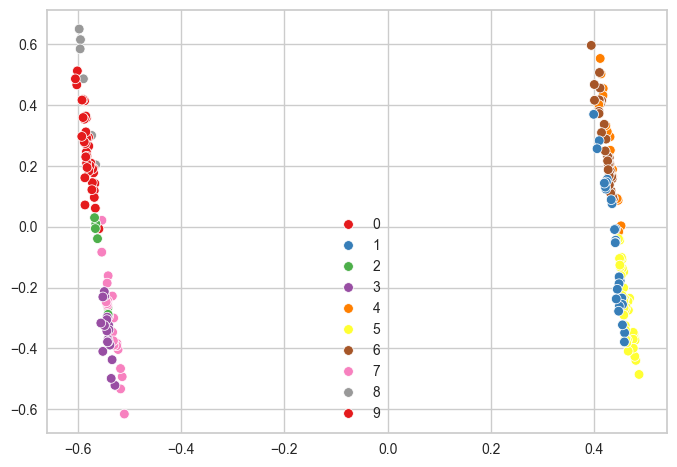

In [143]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(norm_x_km)
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette="Set1")

# IT IS SHIT!